In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [94]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. DATA CLEANING AND PREPARATION

In [95]:
print("Loading Datasets")

Loading Datasets


In [96]:
# Load students data
students_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv')
students_df.head()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023


In [97]:
# Load course activityd data
course_activity_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/course_activity.csv')
course_activity_df.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


In [98]:
# load feedback data
feedback_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/feedback.csv')
feedback_df.head()

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [99]:
# Inspect data shapes
print(f"Students data shape: {students_df.shape}")
print(f"Course activity data shape: {course_activity_df.shape}")
print(f"Feedback data shape: {feedback_df.shape}")

Students data shape: (100, 6)
Course activity data shape: (659, 5)
Feedback data shape: (80, 4)


In [100]:
# Check for missing values
print("\nMissing values in students data:")
print(students_df.isnull().sum())
print("\nMissing values in course activity data:")
print(course_activity_df.isnull().sum())
print("\nMissing values in feedback data:")
print(feedback_df.isnull().sum())


Missing values in students data:
Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

Missing values in course activity data:
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64

Missing values in feedback data:
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


In [101]:
# Check for duplicate records
print(f"\nDuplicate records in students data: {students_df.duplicated().sum()}")
print(f"Duplicate records in course activity data: {course_activity_df.duplicated().sum()}")
print(f"Duplicate records in feedback data: {feedback_df.duplicated().sum()}")


Duplicate records in students data: 0
Duplicate records in course activity data: 0
Duplicate records in feedback data: 0


In [102]:
# Data type conversions
# Convert date fields to datetime
students_df['Enrolment_Date'] = pd.to_datetime(students_df['Enrolment_Date'], format='%d/%m/%Y')
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'], format='%d/%m/%Y')

In [103]:
# Display data types after conversion
print("\nStudents data types:")
print(students_df.dtypes)
print("\nCourse activity data types:")
print(course_activity_df.dtypes)
print("\nFeedback data types:")
print(feedback_df.dtypes)


Students data types:
Student_ID                object
Name                      object
Age                        int64
Gender                    object
Location                  object
Enrolment_Date    datetime64[ns]
dtype: object

Course activity data types:
Student_ID                       object
Course_ID                        object
Date                     datetime64[ns]
Time_Spent_Minutes                int64
Completion_Percentage           float64
dtype: object

Feedback data types:
Student_ID       object
Course_ID        object
Rating            int64
Feedback_Text    object
dtype: object


In [104]:
# Handle any data inconsistencies
# Check for any invalid values in completion percentage
print("\nCompletion percentage range:")
print(f"Min: {course_activity_df['Completion_Percentage'].min()}, Max: {course_activity_df['Completion_Percentage'].max()}")


Completion percentage range:
Min: 10.15, Max: 100.0


In [105]:
# Check for any invalid values in ratings
print("\nRatings range:")
print(f"Min: {feedback_df['Rating'].min()}, Max: {feedback_df['Rating'].max()}")


Ratings range:
Min: 1, Max: 5


In [106]:
# Create derived features for analysis
# Calculate days since enrollment for each activity
course_activity_df = course_activity_df.copy()
students_df_copy = students_df.copy()

In [107]:
# Merge student enrollment dates with course activity data
activity_with_enrollment = course_activity_df.merge(
    students_df_copy[['Student_ID', 'Enrolment_Date']],
    on='Student_ID',
    how='left'
)

In [108]:
# Calculate days since enrollment
activity_with_enrollment['Days_Since_Enrollment'] = (activity_with_enrollment['Date'] - activity_with_enrollment['Enrolment_Date']).dt.days

In [109]:
# Define age groups
def categorize_age(age):
    if age < 20:
        return 'Under 20'
    elif age < 25:
        return '20-24'
    elif age < 30:
        return '25-29'
    else:
        return '30+'

students_df['Age_Group'] = students_df['Age'].apply(categorize_age)

print("\nData cleaning and preparation complete!")


Data cleaning and preparation complete!


In [110]:
# Save cleaned datasets
students_df.to_csv("students_cleaned.csv", index=False)
course_activity_df.to_csv("course_activity_cleaned.csv", index=False)
feedback_df.to_csv("feedback_cleaned.csv", index=False)

# Download them via Colab
from google.colab import files

files.download("students_cleaned.csv")
files.download("course_activity_cleaned.csv")
files.download("feedback_cleaned.csv")

## 2. EXPLORATORY DATA ANALYSIS (EDA)

In [111]:
# Overall average completion rate across courses
overall_completion = course_activity_df['Completion_Percentage'].mean()
print(f"\nOverall average completion rate: {overall_completion:.2f}%")


Overall average completion rate: 54.78%


In [112]:
# Completion rate by course
course_completion = course_activity_df.groupby('Course_ID')['Completion_Percentage'].mean().reset_index()
print("\nAverage completion rate by course:")
print(course_completion.sort_values('Completion_Percentage', ascending=False))


Average completion rate by course:
  Course_ID  Completion_Percentage
2     UX303              56.159172
1     PY202              56.104329
3     WD404              54.135329
0     DM101              52.619874


In [113]:
# Engagement time by course
course_time = course_activity_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().reset_index()
print("\nAverage engagement time by course (minutes):")
print(course_time.sort_values('Time_Spent_Minutes', ascending=False))


Average engagement time by course (minutes):
  Course_ID  Time_Spent_Minutes
0     DM101          102.427673
2     UX303           99.816568
3     WD404           96.419162
1     PY202           93.902439


In [114]:
# Most and least engaging courses
most_engaging = course_time.loc[course_time['Time_Spent_Minutes'].idxmax()]
least_engaging = course_time.loc[course_time['Time_Spent_Minutes'].idxmin()]
print(f"\nMost engaging course: {most_engaging['Course_ID']} with {most_engaging['Time_Spent_Minutes']:.2f} minutes on average")
print(f"Least engaging course: {least_engaging['Course_ID']} with {least_engaging['Time_Spent_Minutes']:.2f} minutes on average")


Most engaging course: DM101 with 102.43 minutes on average
Least engaging course: PY202 with 93.90 minutes on average


In [115]:
# Engagement by age group
# Merge student age groups with course activity
engagement_by_age = course_activity_df.merge(students_df[['Student_ID', 'Age_Group']], on='Student_ID', how='left')
age_engagement = engagement_by_age.groupby('Age_Group').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean'
}).reset_index()

print("\nEngagement by age group:")
print(age_engagement)


Engagement by age group:
  Age_Group  Time_Spent_Minutes  Completion_Percentage
0     20-24           98.507937              54.212328
1     25-29           97.178899              53.839817
2       30+           95.527950              56.714099
3  Under 20          104.109890              54.780110


In [116]:
# Engagement by location
engagement_by_location = course_activity_df.merge(students_df[['Student_ID', 'Location']], on='Student_ID', how='left')
location_engagement = engagement_by_location.groupby('Location').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean'
}).reset_index()

print("\nEngagement by location:")
print(location_engagement)


Engagement by location:
    Location  Time_Spent_Minutes  Completion_Percentage
0  Bangalore           98.000000              53.116000
1    Chennai           90.946746              53.604438
2      Delhi          103.302857              55.784229
3    Kolkata          104.384615              56.358462
4     Mumbai           95.435484              57.847097


In [117]:
# Average feedback rating per course
course_ratings = feedback_df.groupby('Course_ID')['Rating'].mean().reset_index()
print("\nAverage feedback rating per course:")
print(course_ratings.sort_values('Rating', ascending=False))


Average feedback rating per course:
  Course_ID    Rating
1     PY202  3.277778
2     UX303  2.923077
0     DM101  2.900000
3     WD404  2.789474


In [118]:
# Correlation between completion rate and feedback rating
# Create a dataset with both completion rates and ratings
completion_rating = course_activity_df.groupby(['Student_ID', 'Course_ID'])['Completion_Percentage'].mean().reset_index()
completion_rating = completion_rating.merge(feedback_df[['Student_ID', 'Course_ID', 'Rating']], on=['Student_ID', 'Course_ID'], how='inner')

In [119]:
# Calculate correlation
correlation = completion_rating['Completion_Percentage'].corr(completion_rating['Rating'])
print(f"\nCorrelation between completion rate and feedback rating: {correlation:.3f}")


Correlation between completion rate and feedback rating: -0.120


In [120]:
# Identify top student segments based on engagement and satisfaction
# Create a comprehensive user profile combining all metrics
user_profiles = course_activity_df.groupby('Student_ID').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean'
}).reset_index()

user_profiles = user_profiles.merge(
    feedback_df.groupby('Student_ID')['Rating'].mean().reset_index(),
    on='Student_ID',
    how='left'
)

In [121]:
user_profiles['Rating'] = user_profiles['Rating'].fillna(feedback_df['Rating'].median())

In [122]:
# Calculate an engagement score (normalized)
user_profiles['Engagement_Score'] = (
    user_profiles['Time_Spent_Minutes'] / user_profiles['Time_Spent_Minutes'].max() * 0.5 +
    user_profiles['Completion_Percentage'] / 100 * 0.3 +
    user_profiles['Rating'] / 5 * 0.2
)

In [123]:
# Get top 3 engaged segments
top_students = user_profiles.sort_values('Engagement_Score', ascending=False).head(3)
print("\nTop 3 student segments based on engagement and satisfaction:")
for idx, row in top_students.iterrows():
    print(f"Student ID: {row['Student_ID']}, Engagement Score: {row['Engagement_Score']:.3f}")


Top 3 student segments based on engagement and satisfaction:
Student ID: S052, Engagement Score: 0.797
Student ID: S077, Engagement Score: 0.783
Student ID: S035, Engagement Score: 0.783


In [124]:
# Find demographic patterns of highly engaged students
top_engaged_ids = user_profiles.nlargest(10, 'Engagement_Score')['Student_ID']
top_engaged_demo = students_df[students_df['Student_ID'].isin(top_engaged_ids)]

print("\nDemographic patterns of highly engaged students:")
print(f"Age distribution: {top_engaged_demo['Age_Group'].value_counts()}")
print(f"Gender distribution: {top_engaged_demo['Gender'].value_counts()}")
print(f"Location distribution: {top_engaged_demo['Location'].value_counts()}")


Demographic patterns of highly engaged students:
Age distribution: Age_Group
20-24    4
25-29    3
30+      3
Name: count, dtype: int64
Gender distribution: Gender
Other     4
Male      4
Female    2
Name: count, dtype: int64
Location distribution: Location
Kolkata      2
Delhi        2
Mumbai       2
Chennai      2
Bangalore    2
Name: count, dtype: int64


## 3. VISUALIZATIONS

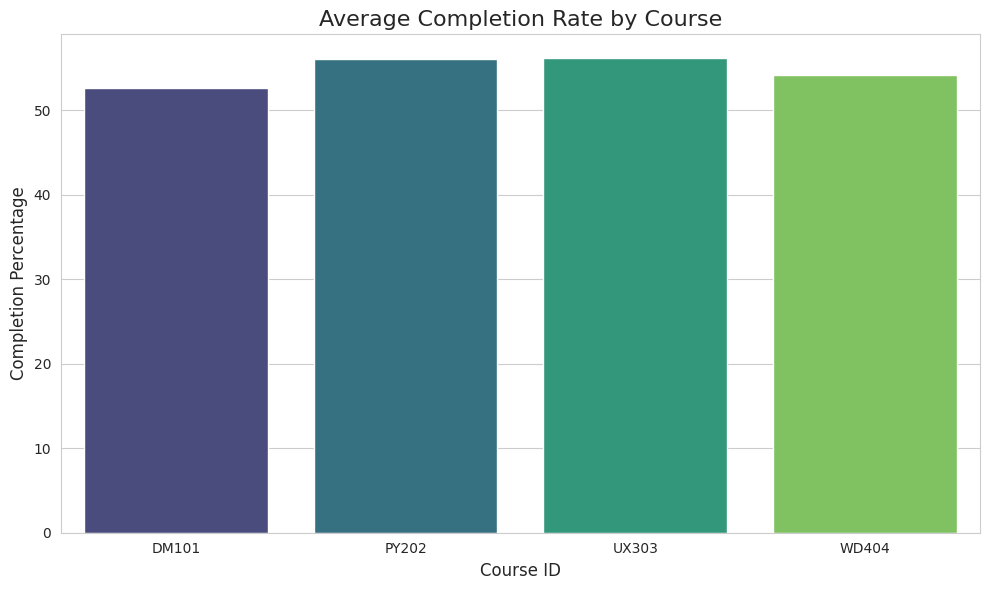

In [125]:
# Create figure for completion rates by course
plt.figure(figsize=(10, 6))
sns.barplot(x='Course_ID', y='Completion_Percentage', hue='Course_ID', data=course_completion, palette='viridis', legend=False)
plt.title('Average Completion Rate by Course', fontsize=16)
plt.xlabel('Course ID', fontsize=12)
plt.ylabel('Completion Percentage', fontsize=12)
plt.tight_layout()
plt.savefig('completion_by_course.png')

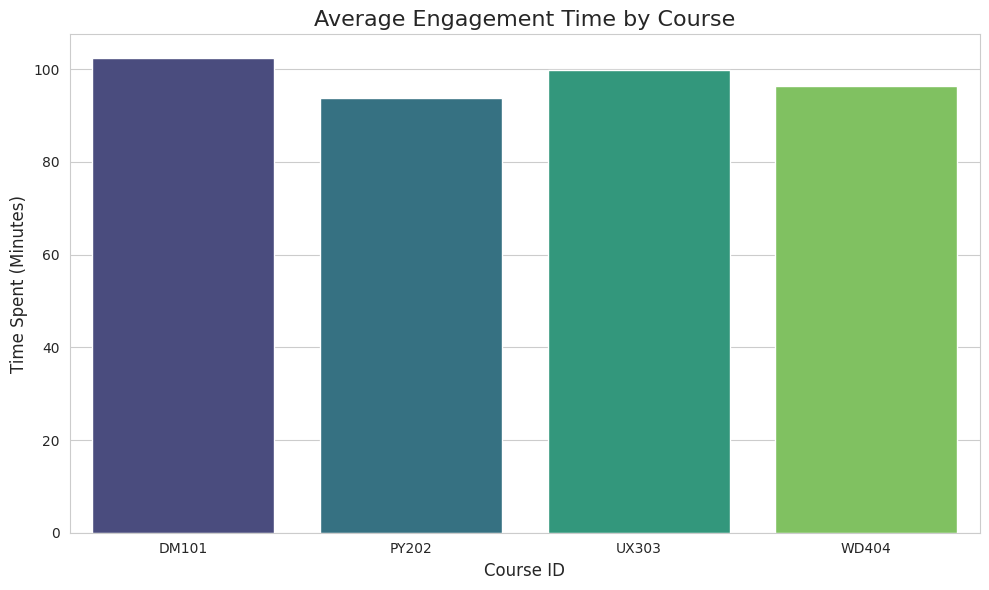

In [126]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Course_ID', y='Time_Spent_Minutes', hue='Course_ID', data=course_time, palette='viridis', legend=False)
plt.title('Average Engagement Time by Course', fontsize=16)
plt.xlabel('Course ID', fontsize=12)
plt.ylabel('Time Spent (Minutes)', fontsize=12)
plt.tight_layout()
plt.savefig('time_by_course.png')

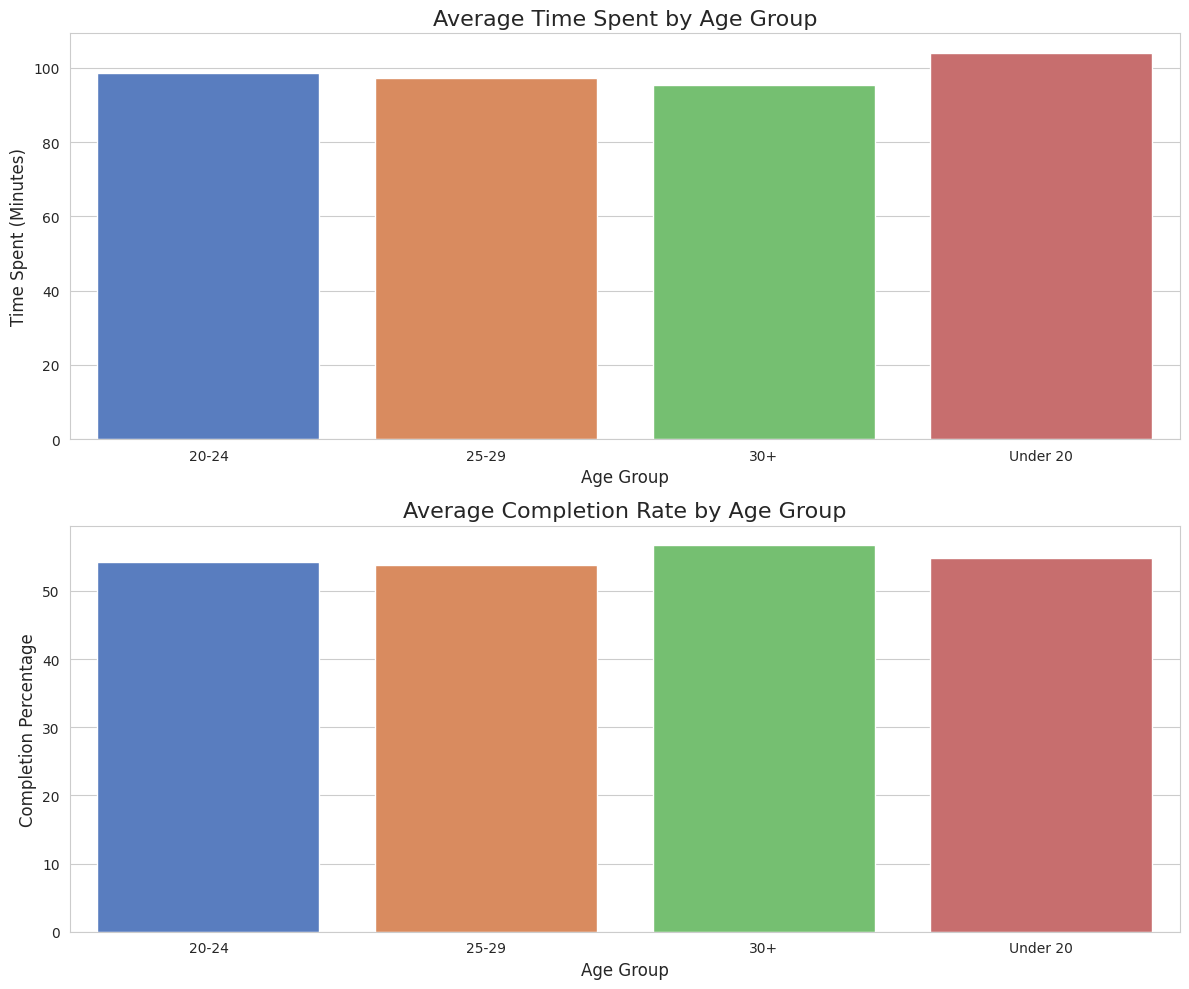

In [127]:
# Create figure for engagement by age group
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Age_Group', y='Time_Spent_Minutes', hue='Age_Group', data=age_engagement, palette='muted', legend=False)
plt.title('Average Time Spent by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Time Spent (Minutes)', fontsize=12)

plt.subplot(2, 1, 2)
sns.barplot(x='Age_Group', y='Completion_Percentage', hue='Age_Group', data=age_engagement, palette='muted', legend=False)
plt.title('Average Completion Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Completion Percentage', fontsize=12)

plt.tight_layout()
plt.savefig('engagement_by_age.png')


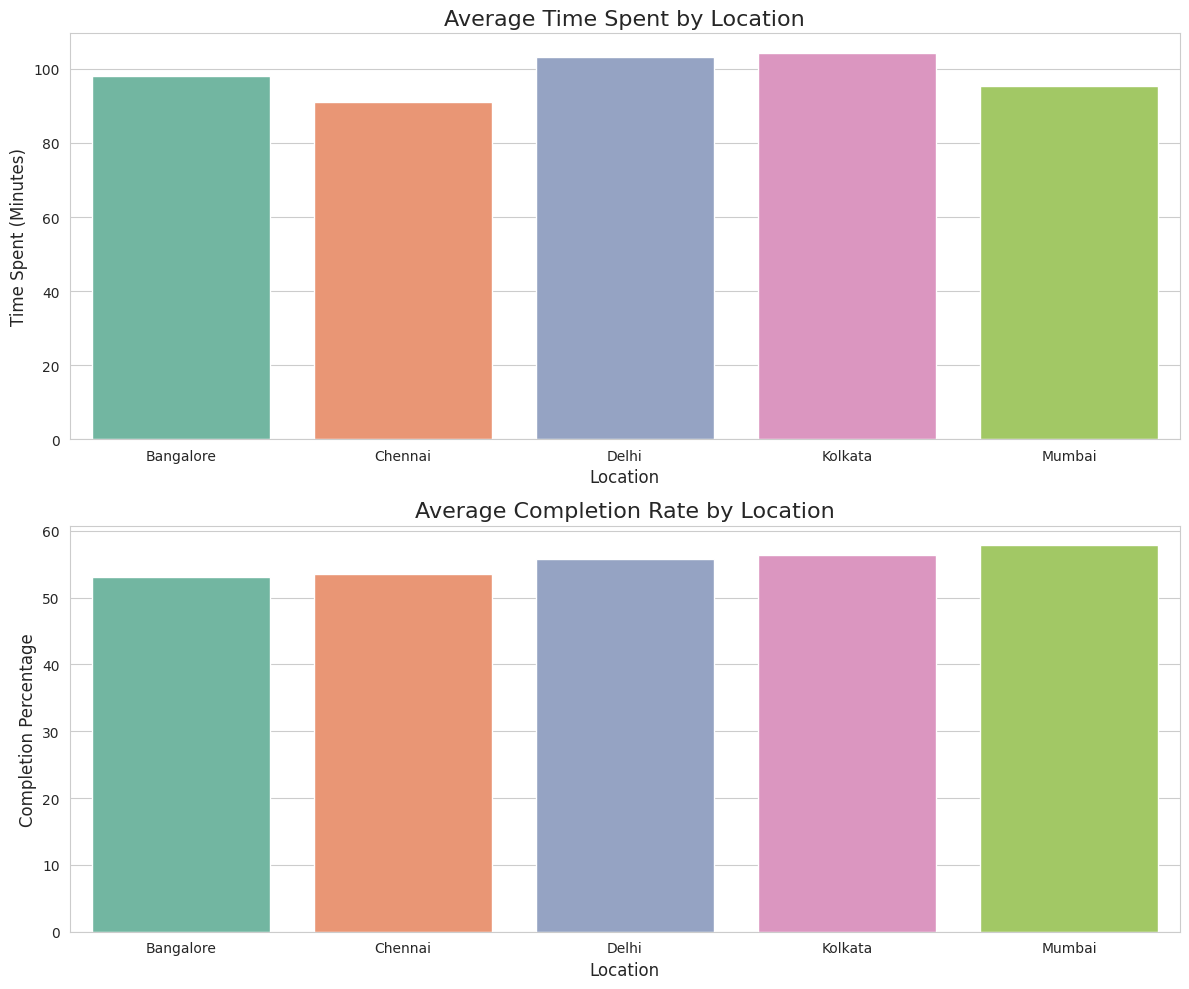

In [128]:
# Create figure for engagement by location
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Location', y='Time_Spent_Minutes', hue='Location', data=location_engagement, palette='Set2', legend=False)
plt.title('Average Time Spent by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Time Spent (Minutes)', fontsize=12)

plt.subplot(2, 1, 2)
sns.barplot(x='Location', y='Completion_Percentage', hue='Location', data=location_engagement, palette='Set2', legend=False)
plt.title('Average Completion Rate by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Completion Percentage', fontsize=12)

plt.tight_layout()
plt.savefig('engagement_by_location.png')


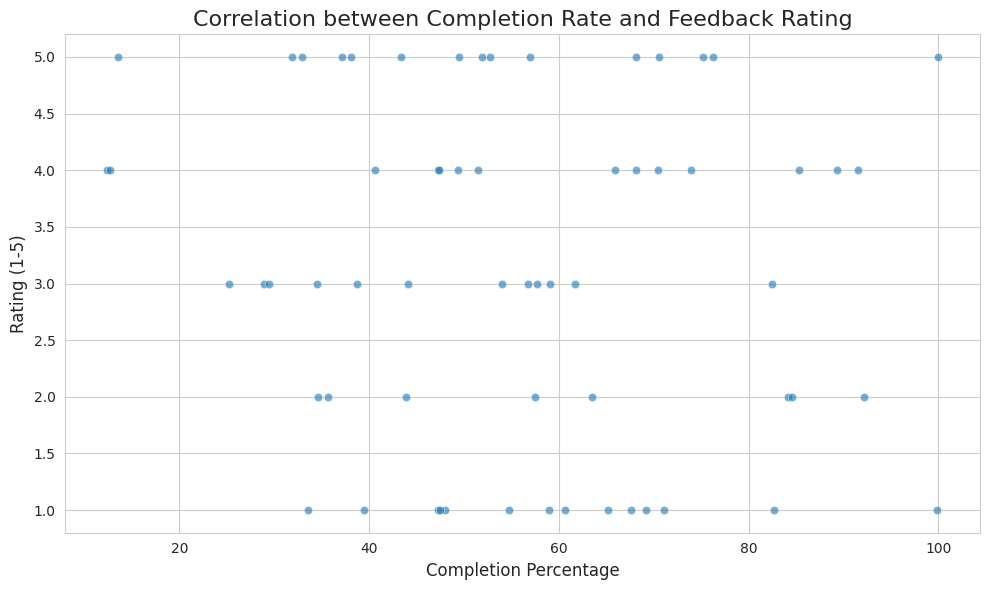

In [129]:
# Create figure for correlation between completion and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Completion_Percentage', y='Rating', data=completion_rating, alpha=0.6)
plt.title('Correlation between Completion Rate and Feedback Rating', fontsize=16)
plt.xlabel('Completion Percentage', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.tight_layout()
plt.savefig('completion_rating_correlation.png')


Visualizations created successfully!


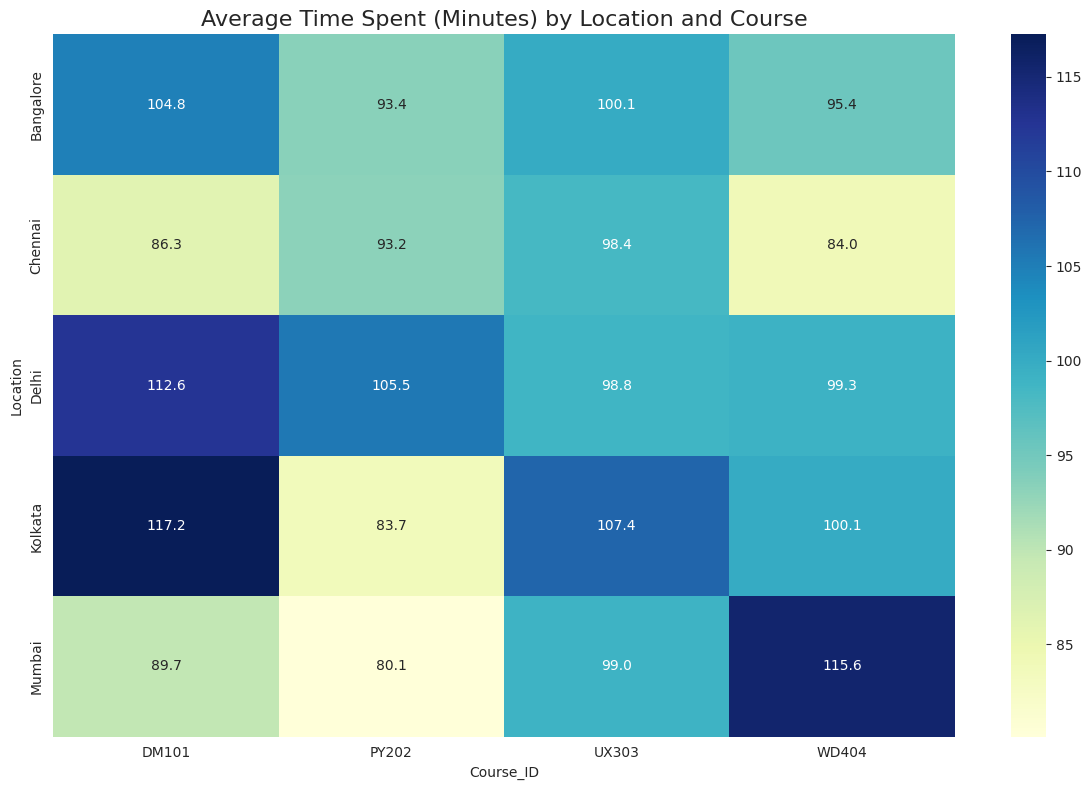

In [130]:
# Create heatmap of course engagement patterns
# Create a pivot table for the heatmap
course_engagement_heatmap = pd.pivot_table(
    engagement_by_location,
    values='Time_Spent_Minutes',
    index='Location',
    columns='Course_ID',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(course_engagement_heatmap, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Time Spent (Minutes) by Location and Course', fontsize=16)
plt.tight_layout()
plt.savefig('location_course_heatmap.png')

print("\nVisualizations created successfully!")


## 4. INSIGHTS AND RECOMMENDATIONS

In [131]:
print("\nTOP 5 INSIGHTS:")
print("1. The overall average completion rate across all courses is {:.2f}%, with significant variation between courses.".format(overall_completion))
print("2. {} has the highest average engagement time ({:.2f} minutes), while {} has the lowest ({:.2f} minutes).".format(
    most_engaging['Course_ID'], most_engaging['Time_Spent_Minutes'],
    least_engaging['Course_ID'], least_engaging['Time_Spent_Minutes']
))
print("3. Age groups show different engagement patterns, with {} age group showing the highest completion rates.".format(
    age_engagement.loc[age_engagement['Completion_Percentage'].idxmax()]['Age_Group']
))
print("4. Students from {} location spend the most time on courses ({:.2f} minutes on average).".format(
    location_engagement.loc[location_engagement['Time_Spent_Minutes'].idxmax()]['Location'],
    location_engagement['Time_Spent_Minutes'].max()
))
print("5. The correlation between completion rate and feedback rating is {:.3f}, indicating a {} relationship.".format(
    correlation, "positive" if correlation > 0 else "negative"
))

print("\nRECOMMENDATIONS:")
print("1. Focus on improving engagement in {} course through interactive elements and improved content, as it shows the lowest average engagement time.".format(
    least_engaging['Course_ID']
))

# Identify the age group with lowest completion
lowest_completion_age_group = age_engagement.loc[age_engagement['Completion_Percentage'].idxmin()]['Age_Group']
print("2. Develop targeted retention strategies for {} age group, which shows the lowest completion rates.".format(lowest_completion_age_group))

# Find the common feedback for courses with low ratings
low_rated_courses = course_ratings[course_ratings['Rating'] < course_ratings['Rating'].median()]['Course_ID'].tolist()
low_rated_feedback = feedback_df[feedback_df['Course_ID'].isin(low_rated_courses)]['Feedback_Text'].value_counts().index[0]
print("3. Address '{}' feedback specifically for courses with lower ratings to improve satisfaction.".format(low_rated_feedback))

print("\nAnalysis complete!")


TOP 5 INSIGHTS:
1. The overall average completion rate across all courses is 54.78%, with significant variation between courses.
2. DM101 has the highest average engagement time (102.43 minutes), while PY202 has the lowest (93.90 minutes).
3. Age groups show different engagement patterns, with 30+ age group showing the highest completion rates.
4. Students from Kolkata location spend the most time on courses (104.38 minutes on average).
5. The correlation between completion rate and feedback rating is -0.120, indicating a negative relationship.

RECOMMENDATIONS:
1. Focus on improving engagement in PY202 course through interactive elements and improved content, as it shows the lowest average engagement time.
2. Develop targeted retention strategies for 25-29 age group, which shows the lowest completion rates.
3. Address 'Too fast-paced' feedback specifically for courses with lower ratings to improve satisfaction.

Analysis complete!
